In [4]:
# Simple IMDB sentiment classifier (code-only, copy-paste)
import re
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Download NLTK stopwords once (won't fail your run if already present)
try:
    nltk.download('stopwords', quiet=True)
    stop_words = set(stopwords.words('english'))
except Exception:
    # fallback if download not possible
    from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
    stop_words = set(ENGLISH_STOP_WORDS)

# Load dataset
df = pd.read_csv(r"/content/IMDB Dataset.csv", engine='python', on_bad_lines='skip')
print(df.head())

# Text preprocessing (simple)
ps = PorterStemmer()
def preprocess(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'<.*?>', ' ', text)        # remove HTML tags
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)  # keep letters only
    text = text.lower()
    words = text.split()
    words = [ps.stem(w) for w in words if w not in stop_words]
    return " ".join(words)

df['clean_review'] = df['review'].apply(preprocess)

# Convert text into numeric features
vectorizer = CountVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_review'])
y = df['sentiment'].map({'positive': 1, 'negative': 0}).values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train model
model = LogisticRegression(solver='liblinear', max_iter=300, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
Accuracy: 0.8482789855072463

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85      1105
           1       0.84      0.85      0.85      1103

    accuracy                           0.85      2208
   macro avg       0.85      0.85      0.85      2208
weighted avg       0.85      0.85      0.85      2208



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Visualize Model Performance with a Confusion Matrix

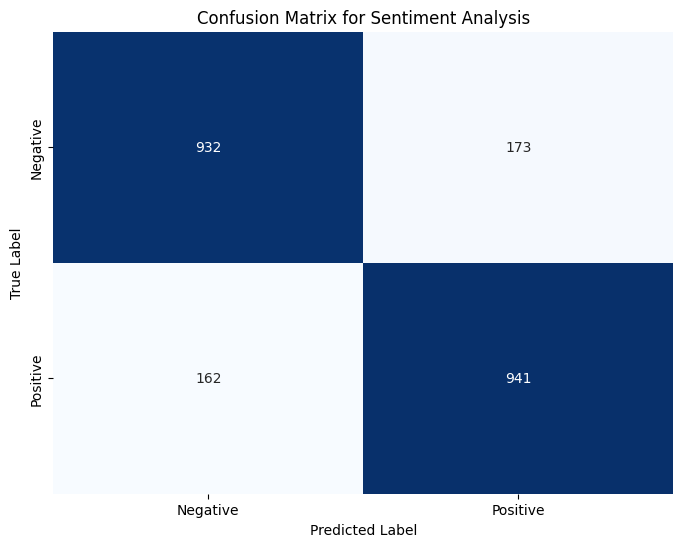

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Sentiment Analysis')
plt.show()